In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report


In [7]:
df = pd.read_csv("bank.csv")
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [13]:
df.replace("unknown", np.nan, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4483 non-null   object
 2   marital    4521 non-null   object
 3   education  4334 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    3197 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   816 non-null    object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [15]:
df.fillna(df.mode().iloc[0], inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [19]:
le = LabelEncoder()

for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])


In [23]:
X = df.drop("y", axis=1)
y = df["y"]
print(X)
print(y)


      age  job  marital  education  default  balance  housing  loan  contact  \
0      30   10        1          0        0     1787        0     0        0   
1      33    7        1          1        0     4789        1     1        0   
2      35    4        2          2        0     1350        1     0        0   
3      30    4        1          2        0     1476        1     1        0   
4      59    1        1          1        0        0        1     0        0   
...   ...  ...      ...        ...      ...      ...      ...   ...      ...   
4516   33    7        1          1        0     -333        1     0        0   
4517   57    6        1          2        1    -3313        1     1        0   
4518   57    9        1          1        0      295        0     0        0   
4519   28    1        1          1        0     1137        0     0        0   
4520   44    2        2          2        0     1136        1     1        0   

      day  month  duration  campaign  p

In [25]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [27]:
dt = DecisionTreeClassifier(
    criterion="gini",
    max_depth=4,
    random_state=42)

dt.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=4, random_state=42)

In [29]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred))

print("\nClassification Report:\n")
print(classification_report(y_test, y_test_pred))


Training Accuracy: 0.9126106194690266
Testing Accuracy: 0.8994475138121547

Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       807
           1       0.56      0.35      0.43        98

    accuracy                           0.90       905
   macro avg       0.74      0.66      0.69       905
weighted avg       0.88      0.90      0.89       905



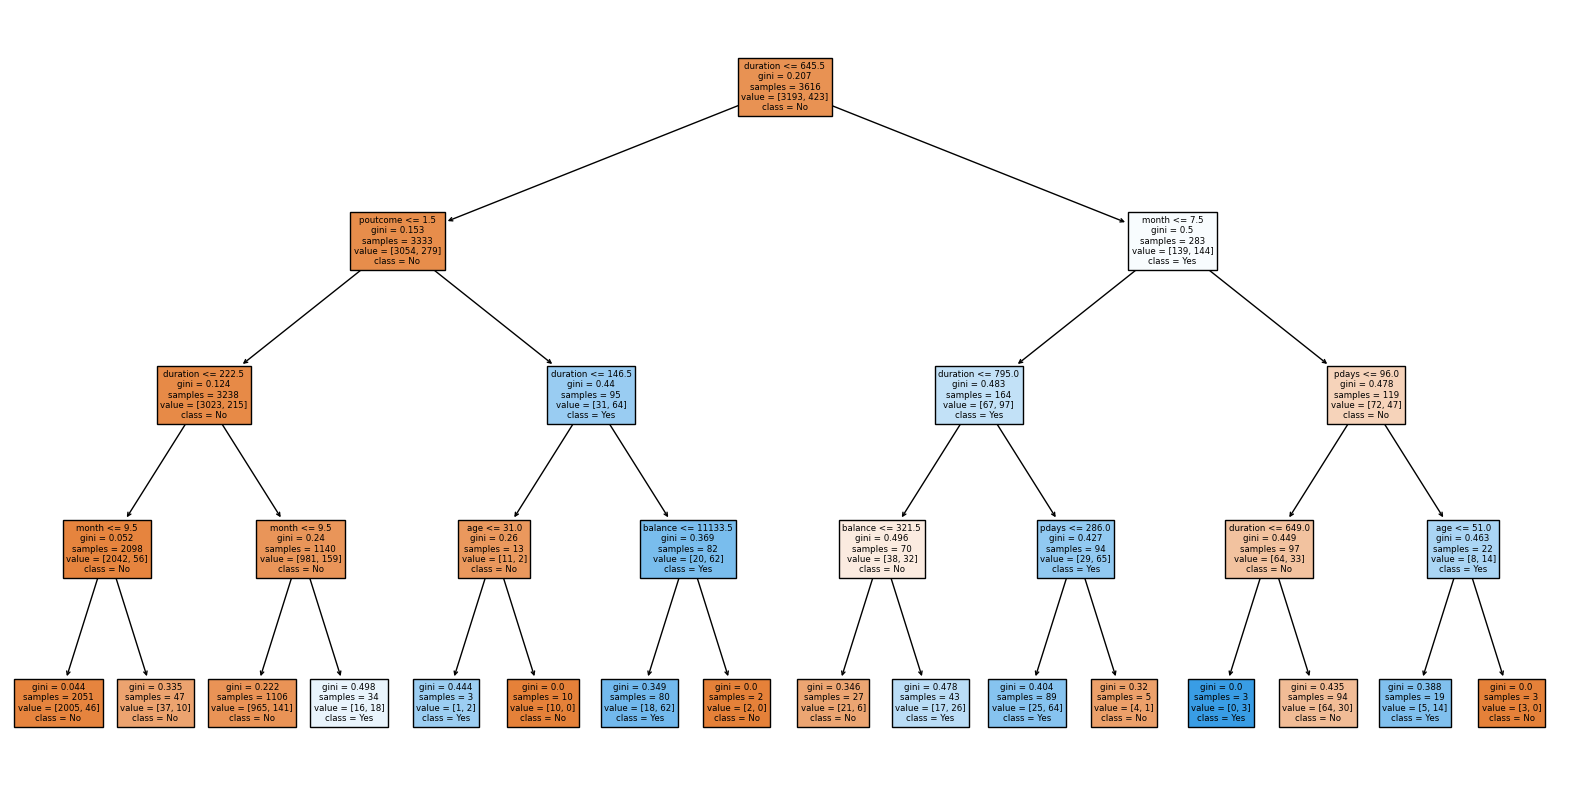

In [31]:
plt.figure(figsize=(20,10))
plot_tree(
    dt,
    feature_names=X.columns,
    class_names=["No", "Yes"],
    filled=True
)
plt.show()


In [33]:
print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))


Train Accuracy: 0.9126106194690266
Test Accuracy: 0.8994475138121547


# 3 key Decision Rules
## Rule 1:
If duration of last call is high and previous outcome was success,
→ customer is likely to subscribe.

## Rule 2:
If contact type is cellular and campaign count is low,
→ higher probability of subscription.

## Rule 3:
If call duration is very short and previous outcome was failure,
→ customer is unlikely to subscribe.